# Analysis of my study habits in the V semester

During the last 2 semesters I have tried to stay disciplined and to log my studying hours every week (with no exceptions 😌). And now, looking back, it is very interesting to analyze, how my time was distributed, whether or not it was different for different subjects and what I did the same hourlywise, when I got good grades.

Assumptions:
> every hour that I logged in was productive and focused -> every hour is equivalent

Questions, that I have in advance:
1) Is it really the case that cramming right before exams positively infuences the grade?  
2) I would suppose that my hours keep growing right till the exam. So, if I ran a linear regression, would the slope be positive?

## Import dependencies & Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
#DATA
data=pd.read_excel("data/Study_Stunden.xlsx",sheet_name="V Semester", header=1)

## Exploring and Maneuver the Data

In [6]:
data.head()

,Date,"Time, h",Festkörper,Bio,Chemie,Start Up,Comp,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2021-10-15,21.00,6.50,8.50,0.00,0.00,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-23,33.50,5.50,6.00,1.00,1.25,6.0,NaN,NaN,Started studying:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-30,25.75,5.50,3.75,2.25,1.50,3.0,NaN,NaN,2021-10-11 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-06,34.00,4.75,4.25,2.00,1.00,4.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-13,31.75,2.25,4.00,1.25,1.25,6.5,NaN,ALL HOURS:,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,"Time, h",Festkörper,Bio,Chemie,Start Up,Comp,Unnamed: 13,Unnamed: 16,Unnamed: 19,Unnamed: 22
count,21.000000,16.000000,16.000000,21.000000,17.000000,16.000000,0.0,0.0,0.0,0.0
mean,25.023810,11.062500,6.687500,5.428571,4.529412,10.531250,NaN,NaN,NaN,NaN
std,11.062579,21.311284,12.664748,12.928927,9.529921,19.752611,NaN,NaN,NaN,NaN
min,1.000000,1.750000,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
25%,21.000000,2.250000,2.375000,0.000000,0.000000,5.250000,NaN,NaN,NaN,NaN
50%,26.750000,5.125000,3.500000,1.250000,1.250000,6.000000,NaN,NaN,NaN,NaN
75%,31.750000,7.375000,4.687500,2.000000,3.500000,7.000000,NaN,NaN,NaN,NaN
max,44.000000,88.500000,53.500000,57.000000,38.500000,84.250000,NaN,NaN,NaN,NaN


In [8]:
data.drop(columns=data.columns[7:], axis=1, inplace=True)

In [9]:
data.rename(columns={"Festkörper": "Festkörperphysik","Bio":"Biophysik", "Comp":"Computational Physics"}, inplace=True)

In [10]:
data.head()

,Date,"Time, h",Festkörperphysik,Biophysik,Chemie,Start Up,Computational Physics
0,2021-10-15,21.00,6.50,8.50,0.00,0.00,6.0
1,2021-10-23,33.50,5.50,6.00,1.00,1.25,6.0
2,2021-10-30,25.75,5.50,3.75,2.25,1.50,3.0
3,2021-11-06,34.00,4.75,4.25,2.00,1.00,4.5
4,2021-11-13,31.75,2.25,4.00,1.25,1.25,6.5


so, there are a lot of NaNs and also exams for "Festkörperphysik" and "Biophysik" took place in the 29-01 - 5-02 week.->so, only first 17 rows should be taken into consideration (for the "Start Up" first 18) Now, lets analyze it:

## V Semester Data

In [11]:
#plot function for the later analysis: Object Oriented Style
def plot_func(data, label):
    ax.plot(data["Date"], data[label], label=label)

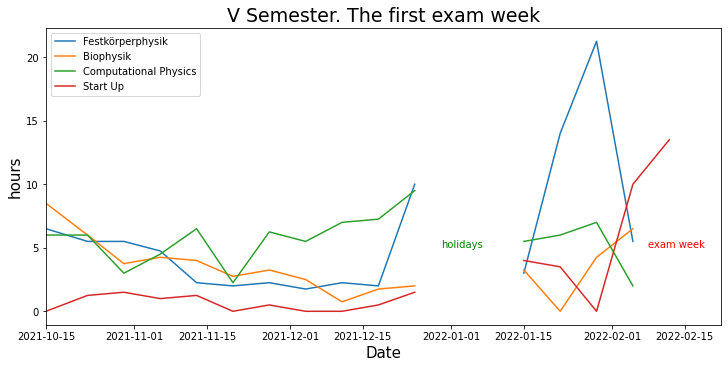

In [12]:

#setting up the plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("hours", fontsize=15)
ax.set_xlim(datetime.strptime("21-10-15", '%y-%m-%d'), datetime.strptime("22-02-22", '%y-%m-%d'))
ax.text(datetime.strptime("21-12-30", '%y-%m-%d'), 5, "holidays", color="g")
ax.text(datetime.strptime("22-02-08", '%y-%m-%d'), 5, "exam week", color="r")
ax.set_title("V Semester. The first exam week", fontsize=19)

labels=["Festkörperphysik", "Biophysik", "Computational Physics", "Start Up"]
for label in labels:
    data_1=data[["Date", label]]
    if label!="Start Up":
        data_1=data_1.iloc[:16] #I took the exam on 3.2
    else:
        data_1=data_1=data_1.iloc[:17] #I took the exam on 13.2
    plot_func(data_1,label)
ax.legend()


As we can clearly see, the exam cramming is there) Especially for the "start up" course. I remember in the first week, I visited the lecture and was sure I can already pretty much wing the exam. But 2 weeks before the exam, they changed the exam format, and I had to really adapt, that is why there is such a peak of the "red" line in the end. 

In the end, my strategy always was to do little steps every day towards each exam, instead of craming on the last day (which does not work btw.)

The grades were:

|Course |Grade| Total Hours,h |
|:-------|:------:|:---------:|
|Biophysik|1,0|53.5|
|Computational Physics|1,0|84.3|
|Festkörperphysik|1,7|88.5|
|Start Up| 1.7 | 38.5|

Studying in advance pays off) In both exams, where I had to study a lot right before the exam I got worse grades.

Now, let's see the Weekly hourly Breakdown (excluding labs and other courses)

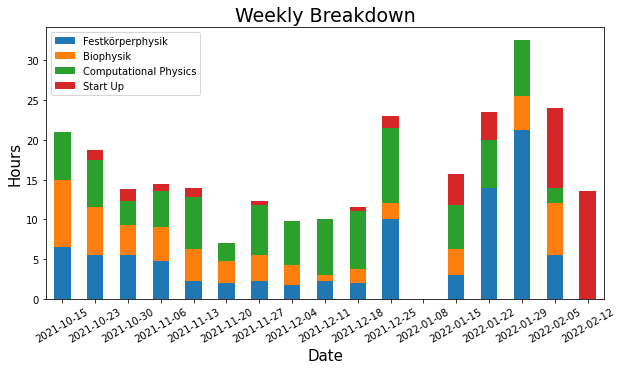

In [13]:
data_plot=data[["Date","Festkörperphysik", "Biophysik", "Computational Physics", "Start Up"]]
data_plot=data_plot.iloc[:17]
data_plot.iloc[16,1:4]=None  # I took the "Start up" exam on the 13.2
data_plot.set_index("Date", inplace=True)

def data_plotting(data_plot):
    ax=data_plot.plot(kind='bar', stacked=True,figsize=(10,5))
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Hours", fontsize=15)
    ax.set_title("Weekly Breakdown",fontsize=19)
    ax.set_xticklabels(data_plot.index.astype(str),rotation=30);
    return ax
ax=data_plotting(data_plot)

Now, lets see all the hours spent in the V semester (with labs and parallel courses that I took in the second exam week)

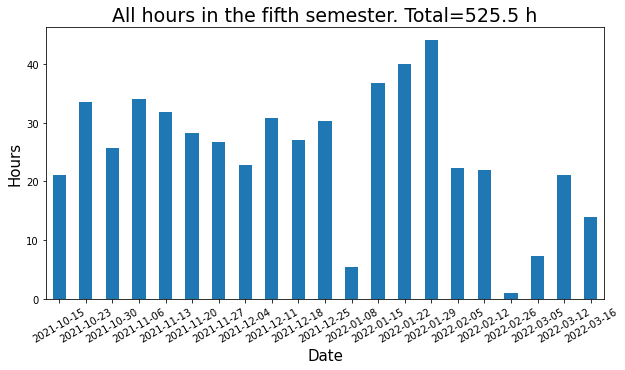

In [14]:
data_all=data.iloc[:21] #because later NaN values
total=data_all["Time, h"].sum()
ax=data_all["Time, h"].plot(kind="bar", figsize=(10,5)) 
ax.set_xticklabels(data_all.Date.astype(str),rotation=30);
ax.set_title("All hours in the fifth semester. Total="+str(total)+" h", fontsize=19);
ax.set_xlabel("Date", fontsize=15);
ax.set_ylabel("Hours", fontsize=15);

as we can see, labs added a little more hours to each week, but since I had no exams there, they can be considered as noise.  
I had also a fifth exam in chemistry on the 16th of March. We can see that, I prepared almost fully one week before and during the exam week I did not pull a lot of hours. The grade was:

|Course |Grade| Total Hours,h |
|:-------|:------:|:---------:|
|Allgemeine Chemie|1,0|57|

Again, the same pattern. Based on the data, if I pull the most hours ~a week before the exam (and it is true, in the last week I normally just went through the prior exams), then I get the best grade. This statement has fairly high confidence, since it held true for different time periods, completely different subjects, and was true whether it was during a semester or a semester break.

But the reverse is not neccesarily true: if one crams for exams in the last week, it is not true, that one will be better off, if one did not. Since if one crams in the first place, one is either not prepared or very anxious (sign of unpreparedness too). And so, without the cramming one will most likely fail.


## Different Fits

### Linear Regression

Now, lets run a linear regression on the data:


In [16]:
from scipy import stats  # to run the linear regression
data_plot["sum"]=0
data_plot["sum"]=data_plot.sum(axis=1).dropna()
x=np.array([i for i in range(0,len(data_plot["sum"]))])

result = stats.linregress(x, data_plot["sum"])
if (result.slope>0):
    print("Slope is Positive, as supposed! r is %.2f. r^2 is %.2f"%(result.rvalue,result.rvalue**2))
else: 
    print("Slope is NOT positive!")

Slope is Positive, as supposed! r is 0.23. r^2 is 0.05


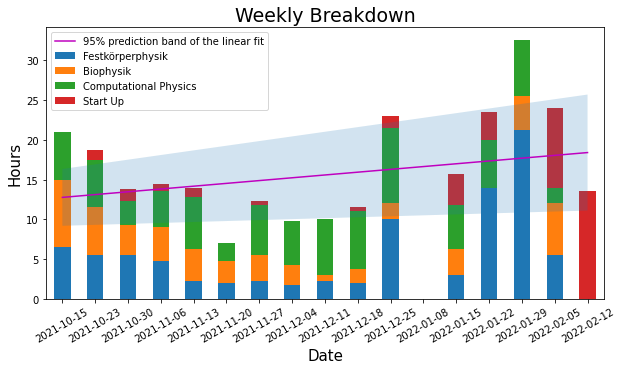

In [17]:
#linear_fit_error:
y_1=(result.slope-result.rvalue)*x+(result.intercept-result.intercept_stderr)
y_2=(result.slope+result.rvalue)*x+(result.intercept+result.intercept_stderr)

#Plotting
ax=data_plotting(data_plot.iloc[:,:4])
ax.plot(x,result.slope*x+result.intercept, label="95% prediction band of the linear fit", color="m")
ax.fill_between(x, y_1, y_2, alpha=0.2)
ax.legend();

#### What does it mean?
As we can see there is almost NO linear correlation for the semester as a whole. 

But normally you learn a ton about the subjet in the first 3-5 weeks, then you start start to hit a plateau. Then you understand how much do you actually not understand and simultaneosly prepare for the exam. So, for me there are normally ***two learning curves*** per subject per semester

<img src=img/learningcurve.jpg width=400/> 

So, that is why it makes sense to use some sort of a sigmoid function

$$y=\frac{1}{1+e^{-x}}$$

or to be more precise:

$$y=\frac{L}{1+e^{-k(x-x0)}}+b$$
(with L,k,b are some coefficients, and x0 is how our function is shifted in the x-axis.

But lets start with at least two linear fits (one declining till hitting the first plateau, then ascending till the exam or near it)

### Two linear fits 

For the declining fit, I will use points till 4-12-21 and all after

In [18]:
#lets start with two linear functions:
x_down=np.array([i for i in range(8)])
res_down = stats.linregress(x_down, data_plot.iloc[:8,4])

x_up=np.array([i for i in range(8,17)])
res_up=stats.linregress(x_up, data_plot.iloc[8:,4])

In [19]:
#linear_fit_down_error:
y_1_down=(res_down.slope-res_down.rvalue)*x_down+(res_down.intercept-res_down.intercept_stderr)
y_2_down=(res_down.slope+res_down.rvalue)*x_down+(res_down.intercept+res_down.intercept_stderr)

In [20]:
#linear_fit_up_error:
y_1_up=(res_up.slope-res_up.rvalue)*x_up+(res_up.intercept-res_up.intercept_stderr)
y_2_up=(res_up.slope+res_up.rvalue)*x_up+(res_up.intercept+res_up.intercept_stderr)

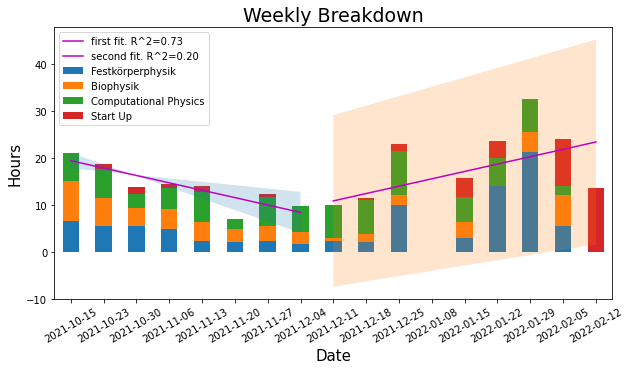

In [21]:
#Plotting
ax=data_plotting(data_plot.iloc[:,:4])
ax.plot(x_down,res_down.slope*x_down+res_down.intercept, label="first fit. R^2=%.2f"%res_down.rvalue**2, color="m")
ax.fill_between(x_down, y_1_down, y_2_down, alpha=0.2)
ax.plot(x_up,res_up.slope*x_up+res_up.intercept, label="second fit. R^2=%.2f"%res_up.rvalue**2, color="m")
ax.fill_between(x_up, y_1_up, y_2_up, alpha=0.2)
ax.legend();

First linear fit has still a relatively good R^2, and so we can say that as the semester progresses, my learning curve almost linearly hit a plateau.
But as I had to dive deeper into the material, ***it does not follow*** the linear fit anymore.

Let's try a sigmoid, just for the fun of it. In essence, we can not really do it, sinse the amount of hours is ***NOT a performance measure***. Because we actually assumed that the less hours I invested, the more sure I was of the material. So, an accurate performance metric would be $$\frac{1}{hours}$$

Since we have better and more data in the first half (before 4.12-11.12), I would want to check, whether my learning curve was actually a sigmoid in the first half.

### Sigmoid fit

#### Accurate metric:

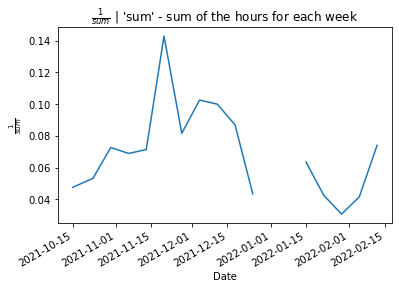

In [22]:
data_plot["1/sum"]=0
data_plot["1/sum"]=1/data_plot["sum"]
data_plot["1/sum"].plot(title=r'$\frac{1}{sum}$'+ " | 'sum' - sum of the hours for each week",ylabel=r'$\frac{1}{sum}$');

#### First half of the data

In [23]:
data_sigmoid=data_plot.iloc[:9,5]
data_sigmoid.head()

Date
2021-10-15    0.047619
2021-10-23    0.053333
2021-10-30    0.072727
2021-11-06    0.068966
2021-11-13    0.071429
Name: 1/sum, dtype: float64

In [24]:
# x
x= [i for i in range(0, 9)]

#### Fit

In [25]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

popt, pcov=curve_fit(sigmoid, x, data_sigmoid)

In [26]:
#Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
st_dev=np.sqrt(np.diag(pcov))

In [27]:
#find the highest and the lowest fit, based on the last point:
y_max=[0]
y_min=[1]

for L in np.linspace(0,st_dev[0],10):
    for x0 in np.linspace(0,st_dev[1],10):
        for k in np.linspace(0,st_dev[2],10):
            for b in np.linspace(0,st_dev[3],10):
                y_1=sigmoid(x,popt[0]+L,popt[1]+x0,popt[2]+k,popt[3]+b)
                if y_1[-1]>y_max[-1] and y_1[-1]>0.06:
                    y_max=y_1
                if y_1[-1]<y_min[-1] and y_1[0]<0.06 and y_1[-1]>.06:
                    y_min=y_1
                y_2=sigmoid(x,popt[0]-L,popt[1]-x0,popt[2]-k,popt[3]-b)
                if y_2[-1]>y_max[-1] and y_2[-1]>0.06:
                    y_max=y_2
                if y_2[-1]<y_min[-1]and y_2[0]<0.06 and y_2[-1]>.06:
                    y_min=y_2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15108\3524991508.py:4: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


#### Plot it

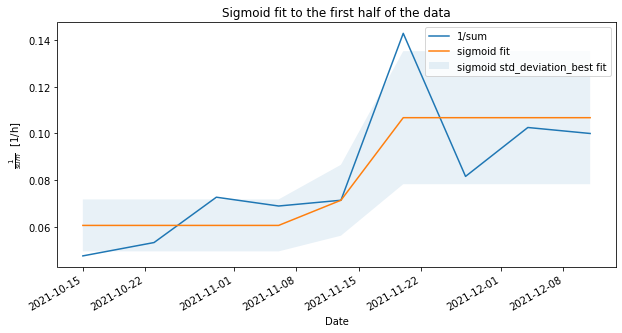

In [28]:
x_fit=np.linspace(0,9,100) #so, the fit looks better
ax=data_sigmoid.plot(title="Sigmoid fit to the first half of the data",ylabel=r'$\frac{1}{sum}$'+"  [1/h]",figsize=(10,5), label="1/sum");
ax.plot(data_sigmoid.index,sigmoid(x,popt[0],popt[1],popt[2],popt[3]), label="sigmoid fit")
ax.fill_between(data_sigmoid.index,y_min,y_max, label="sigmoid std_deviation_best fit", alpha=0.1)
ax.legend();

In an approximation, the curve follows a sigmoid, but again, because we have too little data (9 points), it is difficult to say how good our results are.

In any case, it is super interesting to actually analyze my studying data. It is still difficult for me to fully comprehend, that all the hours I have put in just studying actually had an underlying law. AND it is ***awesome*** that you can just like that actually find a TON of intersting things!

Let's answer our 2 questions from the begining:

## Results and Discussion

1) Question: Is it really the case that cramming right before exams positively infuences the grade?  

No, in my case looking only at the data we have, my "cramming" phase was not good enough to get a 1.0 in "Festkörperphysik" and "Start Up". From that follows that when I crammed I got worse grades. But the statement that cramming is BAD is most likely not true. There are many other factors that play: the difficulty of the exam, my sense of preparedness (maybe without the "cramming" I would have gotten a 3.3 or even worse!). So, even though it follows straight from the data, we can not make a reasonable statement of how bad it is (need of SUPPLEMENTARY information).

But we can say that the reverse holds very likely true. If you do not crame and have the most hours per week before the exam week, you get better grades. I can also not be absolutely sure, since it is difficult to compare different subjects equivalently. If I had data from another classmate, then we could make a better A/B test.

***Takeaway: there are always multiple factors at play -> always ask additional questions. Do not be too rush to make predictions. It is about being truthful and useful, and not about being right for the sake of being ignorantly right.***

2) Question: I would suppose that my hours keep growing right till the exam. So, if I ran a linear regression, would the slope be positive?

Not really. The linear approximation ***was not really the best fit.*** Two linear fits one declining and ascending matched the reality much better.

But the law theoretically should be a sigmoid, and if we choose the right performance metric, it is actually very close to a sigmoid! But we still need at least a little more data to make a confident prediction.

## Thanks

Thank you for reading it that far. I hope it was interesting for you, as it was intersting for me to learn and gain insights in the data. Have a great day!